# TASK 1 : PREDICTION USING SUPERVISED MACHINE LEARNING

In [76]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [77]:
# # Reading the data from the  link
link = 'http://bit.ly/w-data'
student_data = pd.read_csv(link)

# Display first five rows
student_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Inspecting Dataset

In [78]:
# checking shape 
student_data.shape

(25, 2)

In [79]:
# checking info
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [80]:
# checking descriptive summary 
student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Univariate Analysis

Text(0.5, 1.0, 'Boxplot of Hours')

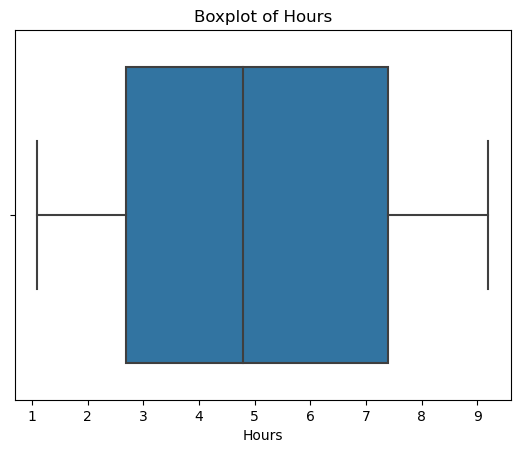

In [81]:
# Univariate Analysis
sns.boxplot(x='Hours', data=student_data)
plt.title('Boxplot of Hours')

Conclusion: There is no outlier present in the column.

# Bivariate Analysis

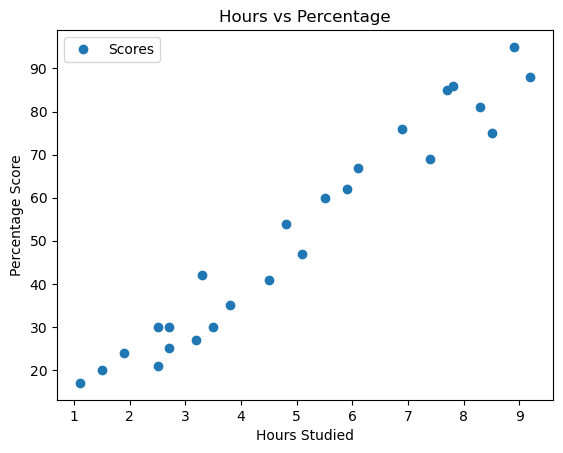

In [82]:
# Bivariate Analysis
student_data.plot(x = 'Hours', y = 'Scores', style = 'o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

Conclusion: Hours and Scores have a linear relationship between them.

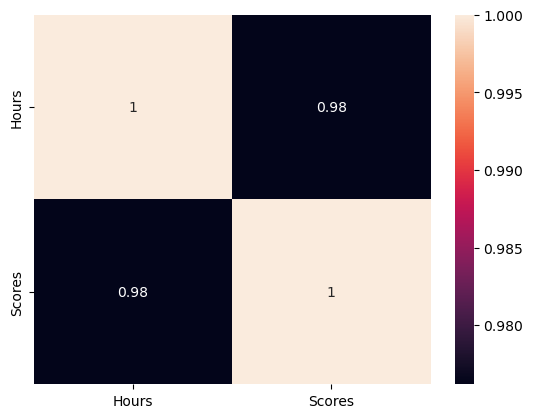

In [83]:
sns.heatmap(student_data.corr(),annot = True)
plt.show()

Conclusion: A correlation factor of 0.98 between "Hours" and "Scores" indicates a very strong linear relationship.

# Splitting Data into Features and Target

In [84]:
# Split the data into features (X) and target (y)
x = student_data['Hours']
y = student_data['Scores']

# Model Training

In [85]:
# Split data into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [86]:
# Checking the shape for all the sets
print('x_train:',x_train.shape)
print('x_test:',x_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

x_train: (20,)
x_test: (5,)
y_train: (20,)
y_test: (5,)


In [87]:
# create a linear regression model
regressor = LinearRegression()

# Train the model
regressor.fit(x_train.values.reshape(-1,1), y_train) 

LinearRegression()

In [88]:
# predict using the test set
y_pred = regressor.predict(x_test.values.reshape(-1,1))
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [89]:
predicted_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
predicted_df

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [90]:
#Estimating training and test score
print('Training Score:',regressor.score(x_train.values.reshape(-1,1),y_train))
print('Testing Score:',regressor.score(x_test.values.reshape(-1,1),y_test))

Training Score: 0.9515510725211552
Testing Score: 0.9454906892105356


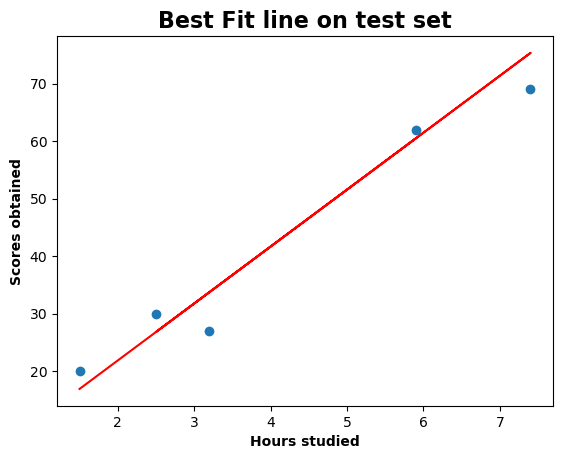

In [91]:
#Visualizing the fit on the test set
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, 'r')
plt.xlabel('Hours studied', fontweight = 'bold')
plt.ylabel('Scores obtained', fontweight = 'bold')
plt.title('Best Fit line on test set', fontweight = 'bold', fontsize = 16)
plt.show()

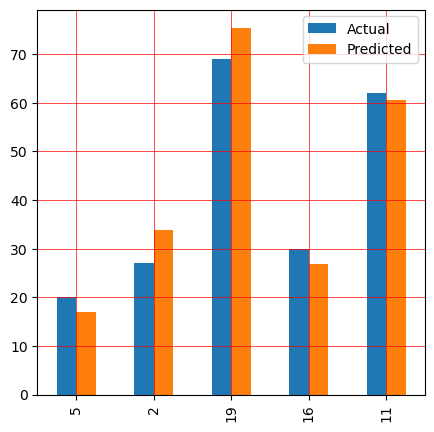

In [92]:
# Plotting the Bar graph to depict the difference between the actual and predicted value

predicted_df.plot(kind='bar',figsize=(5,5))
plt.grid(which='major', linewidth='0.5', color='red')
plt.grid(which='minor', linewidth='0.5', color='blue')
plt.show()

# Evaluating the Model

In [93]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean squared Error:',np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))
print('r-2:',metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 4.183859899002975
Mean squared Error: 21.5987693072174
Root Mean squared Error: 2.0454485813637495
r-2: 0.9454906892105356


The R² score measures how well the model fits the data. An R² of 0.945 means the model explains 94.5% of the variation in the data, which is excellent.






